# Mounting Google Drive

In [1]:
import scipy.io as sio
GOOGLE_COLAB = True
if GOOGLE_COLAB:
    from google.colab import drive, files
    drive.mount('/content/drive')
    data_path = "/content/drive/My Drive/BanglaHandwrittenDigit/"

Mounted at /content/drive


In [2]:
import os
import cv2
import pickle
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import random

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


np.random.seed(10)

%matplotlib inline

In [3]:
DATA_DIR = data_path
TRAIN_DATA_DIR = os.path.join(DATA_DIR, 'train')
VALID_DATA_DIR = os.path.join(DATA_DIR, 'validation')
TEST_DATA_DIR = os.path.join(DATA_DIR, 'test')

# Image size 32 X 32

In [4]:
IMG_SIZE = 32
CATEGORIES = ['0','1','2','3','4','5','6','7','8','9']
   
print(CATEGORIES)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


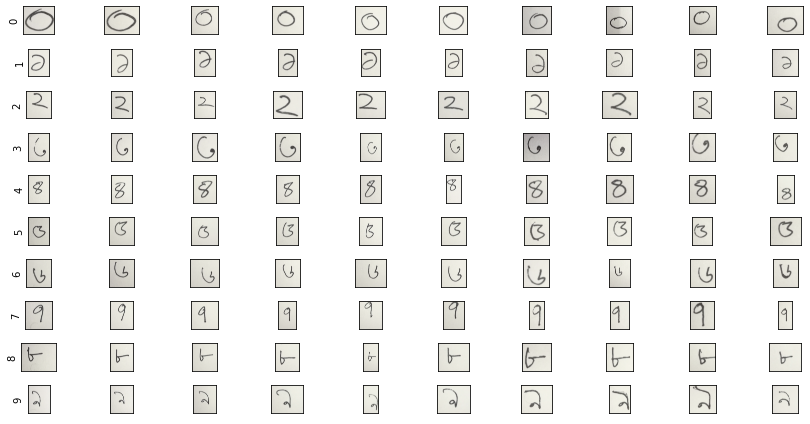

In [5]:
plt.figure(figsize=(12,6))
i=0
for c in CATEGORIES:  
    path = os.path.join(TRAIN_DATA_DIR,c)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        plt.subplot(10,10,i+1)
        plt.imshow(img_array)
        if i%10 == 0:
            plt.ylabel(c)
        plt.xticks([])
        plt.yticks([])
        i += 1
        if i%10 == 0:
            break

plt.tight_layout()        
plt.show()

In [6]:
training_data = []

for c in CATEGORIES:
    path = os.path.join(TRAIN_DATA_DIR, c) 
    class_num = CATEGORIES.index(c) 
    for img in tqdm(os.listdir(path)):
        try:
            img_array = cv2.imread(os.path.join(path, img))   
            img_resized = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE)) 
            training_data.append([img_resized, class_num]) 
        except WException as e:
            pass
        
print(len(training_data))

100%|██████████| 14/14 [00:01<00:00, 12.22it/s]

140


In [7]:
valid_data = []

for c in CATEGORIES:
    path = os.path.join(VALID_DATA_DIR, c) 
    class_num = CATEGORIES.index(c) 
    for img in tqdm(os.listdir(path)):
        try:
            img_array = cv2.imread(os.path.join(path, img))   
            img_resized = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  
            valid_data.append([img_resized, class_num])
        except WException as e:
            pass
        
print(len(valid_data))

100%|██████████| 3/3 [00:00<00:00,  3.81it/s]

30


In [8]:
test_data = []

for c in CATEGORIES:
    path = os.path.join(TEST_DATA_DIR, c) 
    class_num = CATEGORIES.index(c) 
    for img in tqdm(os.listdir(path)):
        try:
            img_array = cv2.imread(os.path.join(path, img))   
            img_resized = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  
            test_data.append([img_resized, class_num])
        except WException as e:
            pass
        
print(len(test_data))

100%|██████████| 3/3 [00:00<00:00,  3.68it/s]

30


In [9]:
random.shuffle(training_data)
random.shuffle(valid_data)
# random.shuffle(test_data)

In [10]:
X_train = []
Y_train = []
# X_train.shape
for img, label in training_data:
    X_train.append(img)
    Y_train.append(label)
    
X_train = np.array(X_train).astype('float32').reshape(-1,IMG_SIZE,IMG_SIZE,3)
Y_train = np.array(Y_train)

print(f"X_train= {X_train.shape} Y_train= {Y_train.shape}")

X_train= (140, 32, 32, 3) Y_train= (140,)


In [11]:
X_valid = []
Y_valid = []

for img, label in valid_data:
    X_valid.append(img)
    Y_valid.append(label)
    
X_valid = np.array(X_valid).astype('float32').reshape(-1,IMG_SIZE,IMG_SIZE,3)
Y_valid = np.array(Y_valid)

print(f"X_valid= {X_valid.shape} Y_valid= {Y_valid.shape}")

X_valid= (30, 32, 32, 3) Y_valid= (30,)


In [12]:
X_test = []
Y_test = []

for features,label in test_data:
    X_test.append(features)
    Y_test.append(label)

X_test = np.array(X_test).astype('float32').reshape(-1, IMG_SIZE, IMG_SIZE, 3)
Y_test = np.array(Y_test)

print(f"X_test= {X_test.shape} Y_test= {Y_test.shape}")

X_test= (30, 32, 32, 3) Y_test= (30,)


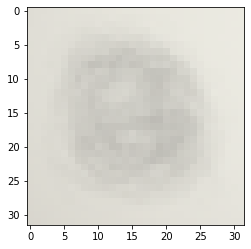

In [13]:
mean_img = np.mean(X_train, axis=0)
plt.imshow(mean_img.astype('uint8'))

In [14]:
X_train_norm, X_valid_norm, X_test_norm = X_train-mean_img, X_valid-mean_img, X_test-mean_img

# Image matrix before mean subtraction

In [15]:
print(X_train[0])

[[[213. 209. 204.]
  [215. 213. 205.]
  [216. 212. 207.]
  ...
  [235. 233. 225.]
  [235. 233. 225.]
  [236. 234. 226.]]

 [[212. 209. 204.]
  [216. 213. 205.]
  [217. 214. 209.]
  ...
  [235. 233. 225.]
  [236. 234. 226.]
  [236. 234. 226.]]

 [[213. 210. 202.]
  [215. 211. 206.]
  [214. 210. 205.]
  ...
  [235. 233. 225.]
  [236. 233. 228.]
  [236. 233. 228.]]

 ...

 [[213. 210. 202.]
  [213. 213. 202.]
  [215. 213. 208.]
  ...
  [234. 232. 224.]
  [236. 234. 226.]
  [237. 234. 229.]]

 [[212. 208. 203.]
  [210. 208. 200.]
  [215. 209. 204.]
  ...
  [233. 231. 223.]
  [234. 233. 225.]
  [235. 233. 225.]]

 [[209. 206. 201.]
  [214. 211. 203.]
  [213. 210. 205.]
  ...
  [233. 231. 223.]
  [234. 232. 224.]
  [235. 233. 225.]]]


# Image matrix after mean subtraction

In [16]:
print(X_train_norm[0])

[[[-10.8285675  -12.707138    -9.892853  ]
  [ -9.435715    -9.371429    -9.600006  ]
  [ -8.84285    -10.899994    -7.9714355 ]
  ...
  [ -0.12857056  -0.65715027  -0.3500061 ]
  [ -0.01428223  -0.72143555  -0.36428833]
  [  0.52856445  -0.05714417   0.1000061 ]]

 [[-11.521423   -12.557144    -9.75      ]
  [ -8.414291    -9.3285675   -9.485718  ]
  [ -8.007141    -9.09285     -6.107147  ]
  ...
  [ -0.1714325   -0.8214264   -0.3999939 ]
  [  0.62142944   0.05714417   0.4285736 ]
  [  0.5357208   -0.11428833   0.18571472]]

 [[-10.985718   -11.899994   -11.992859  ]
  [ -9.485718   -11.542862    -8.642853  ]
  [-10.928574   -12.957138   -10.028564  ]
  ...
  [ -0.19999695  -0.8357086   -0.3999939 ]
  [  0.62142944  -1.0214233    2.4142914 ]
  [  0.6428528   -1.0142822    2.3785706 ]]

 ...

 [[ -4.8857117   -5.449997    -5.2714233 ]
  [ -5.4714355   -3.149994    -5.892853  ]
  [ -3.75        -3.350006    -0.2571411 ]
  ...
  [  4.535721     4.4142914    4.3357086 ]
  [  6.5785675    

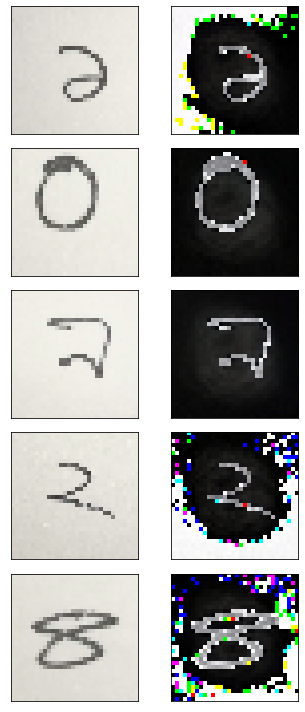

In [17]:
c = 0
plt.figure(figsize=(5,10))
for i in range(5):
    plt.subplot(5,2,c+1)
    plt.imshow(X_train[i].astype('uint8'))
    plt.xticks([])
    plt.yticks([])
    
    plt.subplot(5,2,c+2)
    plt.imshow(X_train_norm[i].astype('uint8'))
    plt.xticks([])
    plt.yticks([])

    c += 2
    
plt.tight_layout()
plt.show()

In [24]:
model = keras.Sequential([
    ## input layer
    keras.Input(shape=X_train.shape[1:]),
    
    
    layers.Conv2D(filters=50, kernel_size=(3,3), strides=(1,1), padding='valid'),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2,2), strides=(1,1), padding='same'),
    layers.BatchNormalization(),
    
    layers.Conv2D(filters=20, kernel_size=(3,3), strides=(1,1), padding='valid'),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2,2), strides=(1,1), padding='same'),
    layers.BatchNormalization(),
    
    layers.Conv2D(filters=10, kernel_size=(3,3), strides=(1,1), padding='valid'),
    layers.Activation('relu'),
    layers.BatchNormalization(),
    
    
    layers.Flatten(),
    
    layers.Dense(units=6760),
    layers.Activation('relu'),
    layers.Dropout(0.5),
    layers.BatchNormalization(),
    

    layers.Dense(units=250),
    layers.Activation('relu'),
    layers.Dropout(0.5),
    layers.BatchNormalization(),

    layers.Dense(10),
    layers.Activation('softmax')
])

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 30, 30, 50)        1400      
                                                                 
 activation_40 (Activation)  (None, 30, 30, 50)        0         
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 30, 30, 50)       0         
 g2D)                                                            
                                                                 
 batch_normalization_33 (Bat  (None, 30, 30, 50)       200       
 chNormalization)                                                
                                                                 
 conv2d_19 (Conv2D)          (None, 28, 28, 20)        9020      
                                                                 
 activation_41 (Activation)  (None, 28, 28, 20)       

In [25]:
#Compile the model
model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [26]:
#Fit the model for validation
h = model.fit(x=X_train_norm, y=Y_train, epochs=100, validation_data=(X_valid_norm, Y_valid), batch_size=10)

Epoch 1/100
14/14 [==============================] - 13s 62ms/step - loss: 2.3691 - accuracy: 0.2286 - val_loss: 60.6122 - val_accuracy: 0.3000
Epoch 2/100
14/14 [==============================] - 0s 34ms/step - loss: 1.6100 - accuracy: 0.4500 - val_loss: 39.9093 - val_accuracy: 0.2667
Epoch 3/100
14/14 [==============================] - 0s 33ms/step - loss: 1.5180 - accuracy: 0.5286 - val_loss: 40.0801 - val_accuracy: 0.2000
Epoch 4/100
14/14 [==============================] - 0s 33ms/step - loss: 1.1187 - accuracy: 0.6143 - val_loss: 32.9043 - val_accuracy: 0.2000
Epoch 5/100
14/14 [==============================] - 0s 34ms/step - loss: 1.0395 - accuracy: 0.6786 - val_loss: 28.0322 - val_accuracy: 0.2000
Epoch 6/100
14/14 [==============================] - 0s 33ms/step - loss: 1.0757 - accuracy: 0.6714 - val_loss: 21.3675 - val_accuracy: 0.2333
Epoch 7/100
14/14 [==============================] - 0s 34ms/step - loss: 0.9196 - accuracy: 0.7286 - val_loss: 12.7141 - val_accuracy: 0.366

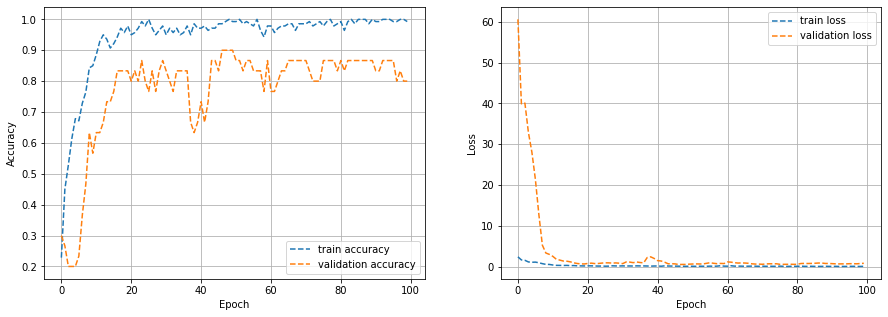

In [27]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], '--', label='train accuracy')
plt.plot(h.history['val_accuracy'], '--', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], '--', label='train loss')
plt.plot(h.history['val_loss'], '--', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [28]:
#Check test data accuracy
test_loss, test_acc = model.evaluate(X_test_norm, Y_test)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)

1/1 [==============================] - 0s 354ms/step - loss: 0.5893 - accuracy: 0.8333

Test Accuracy: 0.8333333134651184

Test Loss: 0.5892646908760071


(30, 32, 32, 3)
(30, 32, 32, 3)
(32, 32, 3)


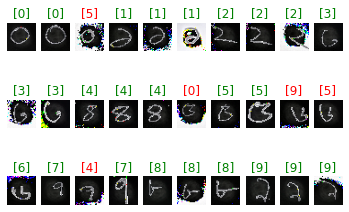

In [30]:
img_test = np.reshape(X_test_norm, [-1,32,32,3], order = 'F')
print(X_test_norm.shape)
print(img_test.shape)
print(img_test[0].shape)

predictions_new = model.predict(img_test)


for i in range(30):
    
    # plt.imshow(X_test_norm[i].astype('uint8'))
    plt.subplot(3 ,10,i+1)
    if Y_test[i] == np.argmax(predictions_new[i]):
        plt.title([np.argmax(predictions_new[i])], color='g')
    else:
        plt.title([np.argmax(predictions_new[i])], color='r')
    plt.axis('off')
    plt.xticks([]) 
    plt.yticks([])
    plt.imshow(X_test_norm[i].astype('uint8'))

In [31]:
model.save('bangla_digit_classifier.model', save_format = 'h5')